# Experimental

In [1]:
import NeuralNetwork as nn
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

In [2]:
data = MNIST('./data')

X_train, y_train = data.load_training()
X_test, y_test = data.load_testing()
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
y_train = nn.OneHot(y_train)
y_test = nn.OneHot(y_test)

## Comparing number of nodes on the first layer's effects on results

In [3]:
nn1 = nn.BuildModel([("tanh", 784, 101), ("relu", 101, 20), ("softmax", 20, 10)])

In [4]:
nn2 = nn.BuildModel([("tanh", 784, 50), ("relu", 50, 16), ("softmax", 16, 10)])

In [5]:
cost, score = nn.Train(nn1, X_train, y_train, num_epochs=100, batch_s=40, learning_rate=.01)

Training started, may take few minutes.
Training completed in 499.9056053161621 seconds.


In [6]:
cost_nn2, score_nn2 = nn.Train(nn2, X_train, y_train, num_epochs=100, batch_s=40, learning_rate=.01)

Training started, may take few minutes.
Training completed in 337.2667315006256 seconds.


In [7]:
prediction = nn.Predict(X_test, nn1)
test_accuracy = nn.CalculateAccuracy(prediction, y_test)

In [8]:
prediction_nn2 = nn.Predict(X_test, nn2)
test_accuracy_nn2 = nn.CalculateAccuracy(prediction_nn2, y_test)

Training Accuracy = 99.54
Test Accuracy = 97.64


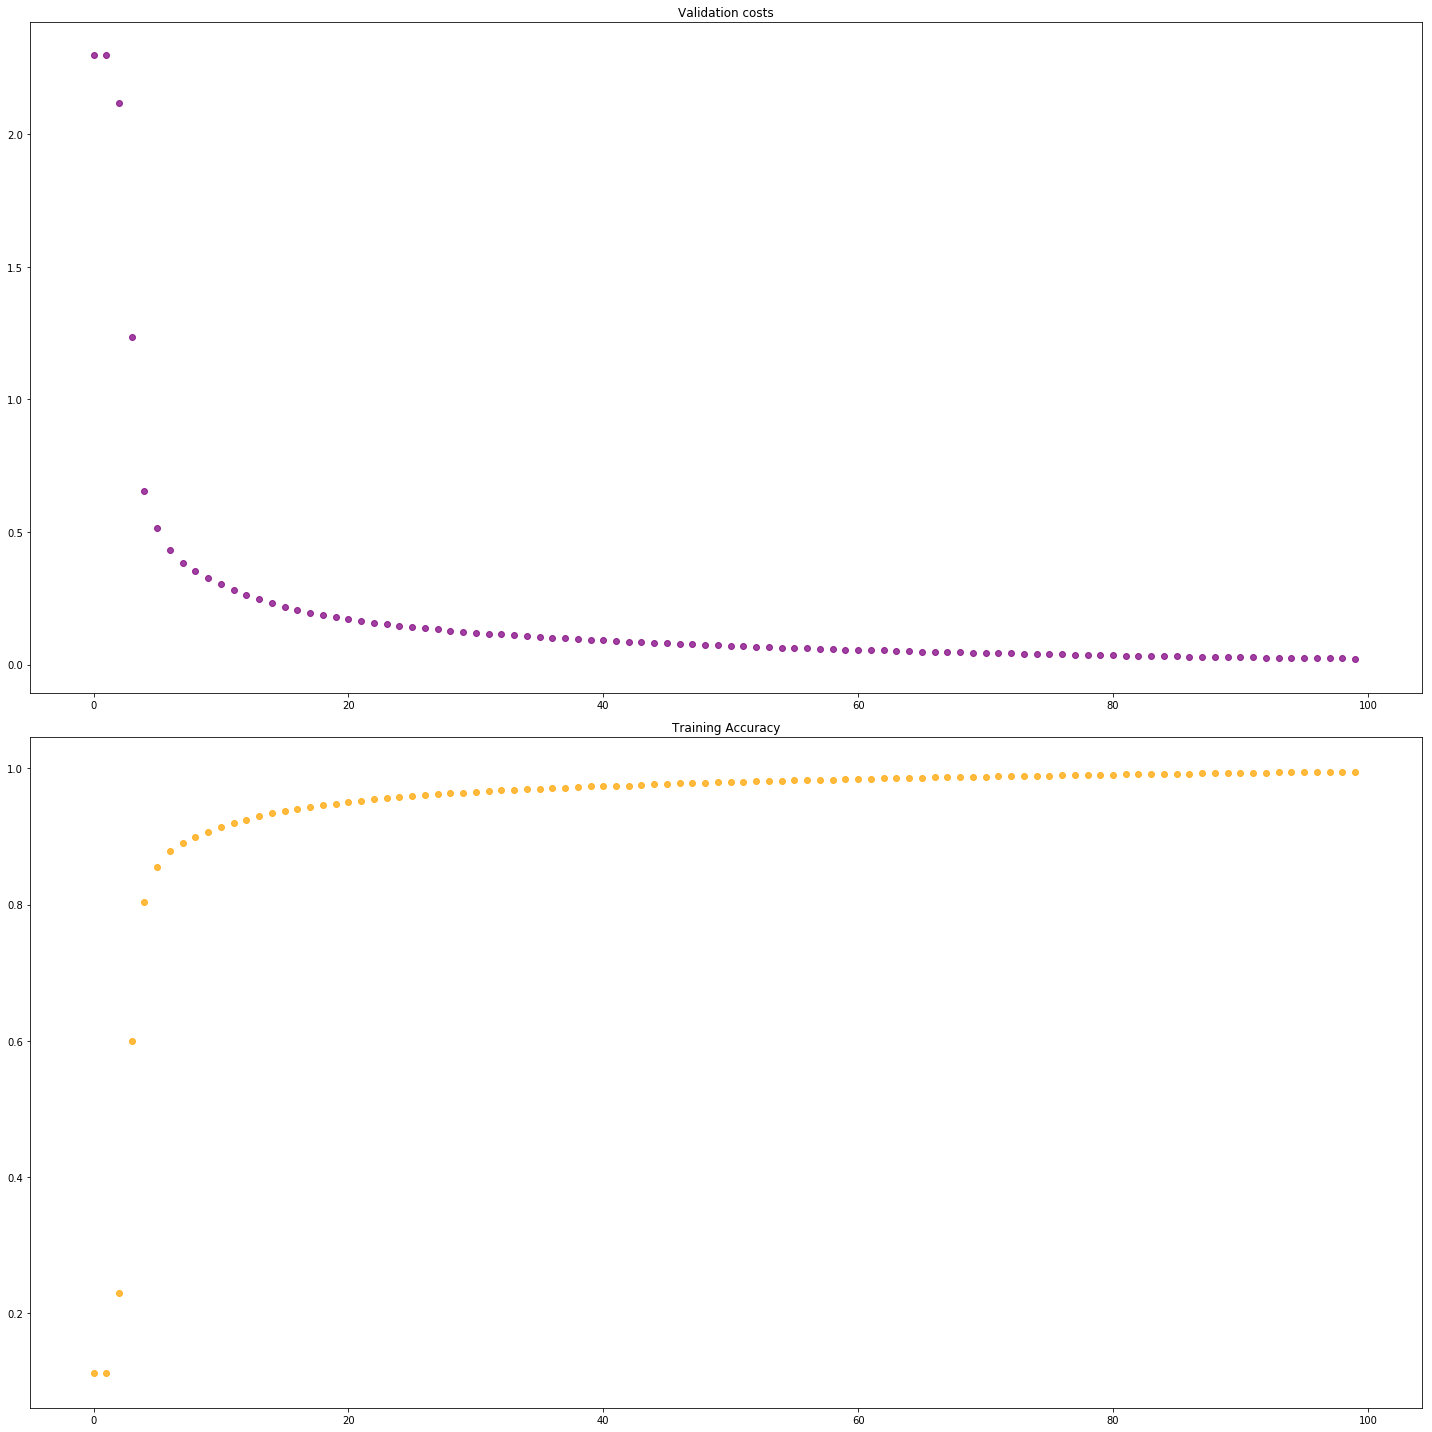

In [9]:
nn.PlotResults(score, test_accuracy, cost)

Training Accuracy = 99.1116666667
Test Accuracy = 96.97


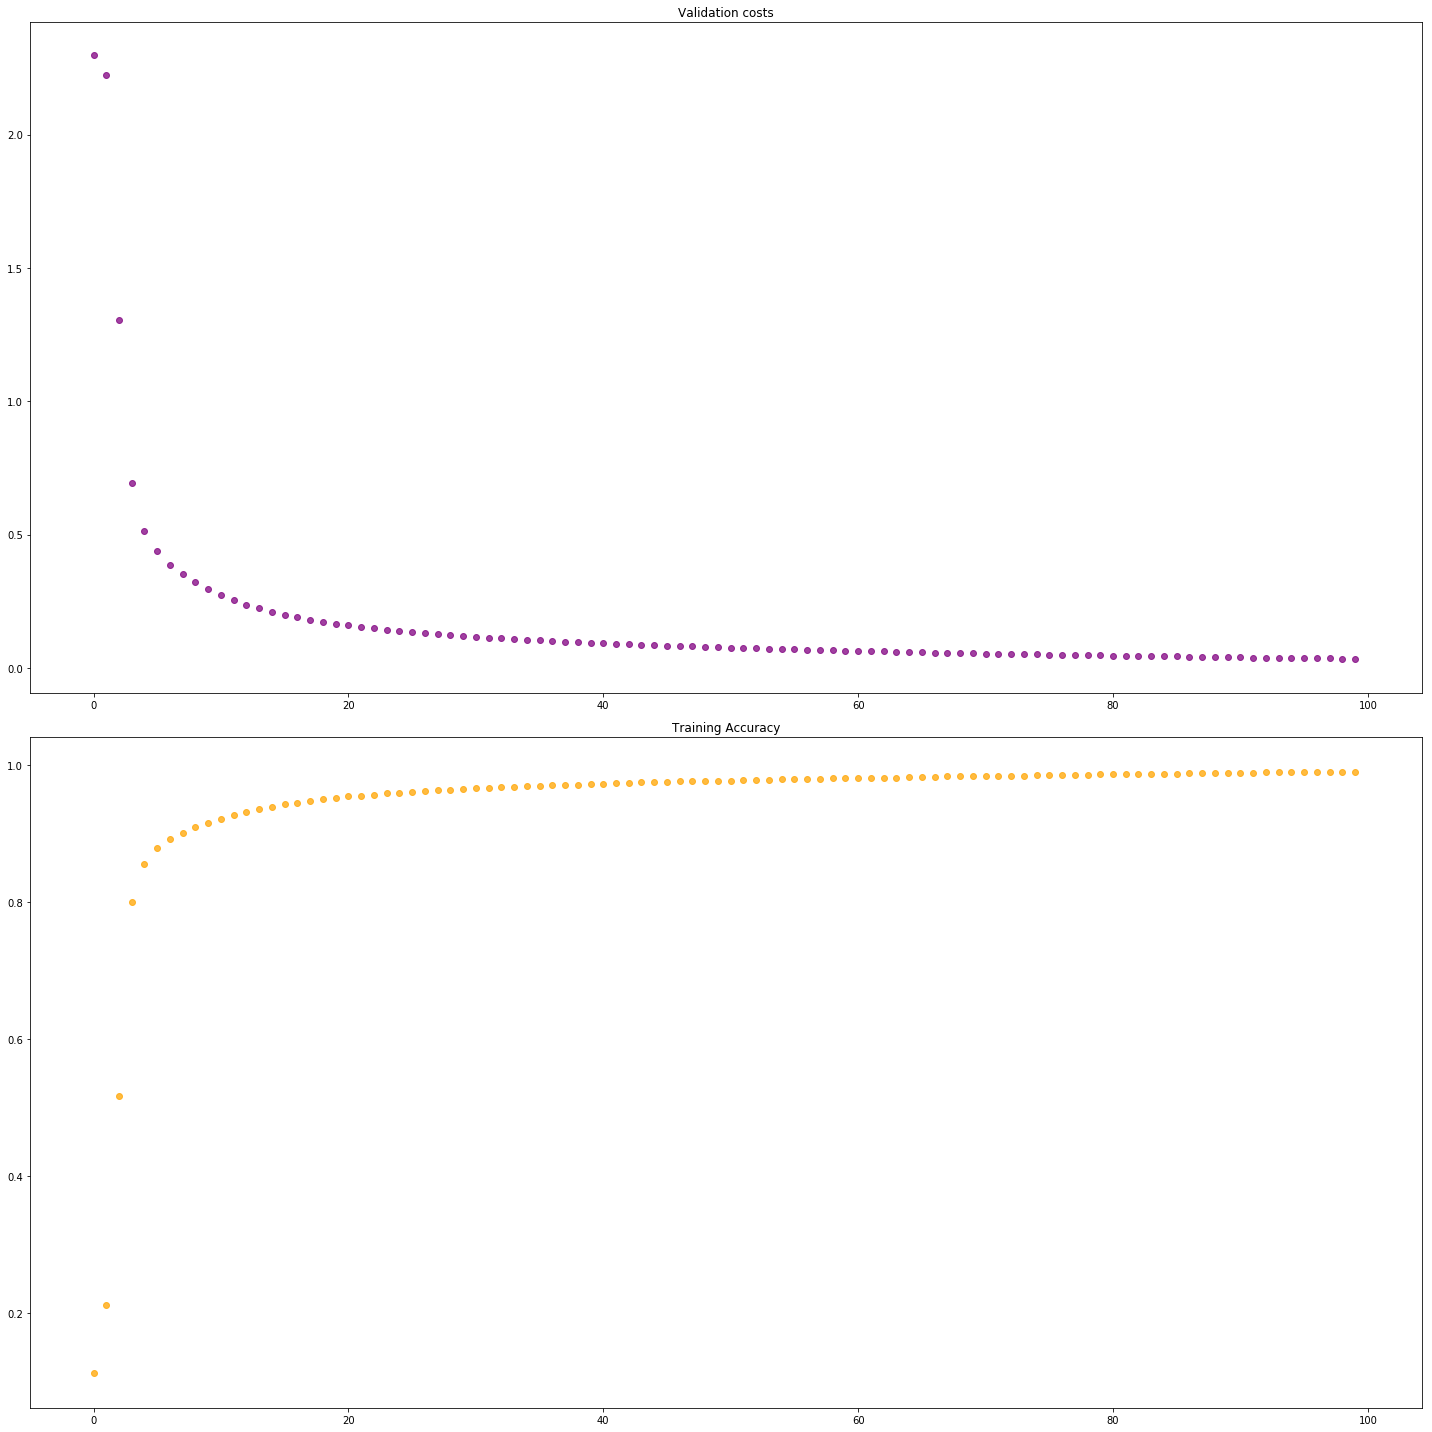

In [10]:
nn.PlotResults(score_nn2, test_accuracy_nn2, cost_nn2)

nn1 vs nn2: altering only number of nodes in the first layer. nn1 has 101 nodes and nn2 has 50 nodes on their first layers with tanh activation. Results are close to each other but nn2 slightly performed better in terms of achieving higher training accuracy in first few epochs. nn1 performed 97.6% test accuracy while nn2 performed 96.9% on test accuracy.

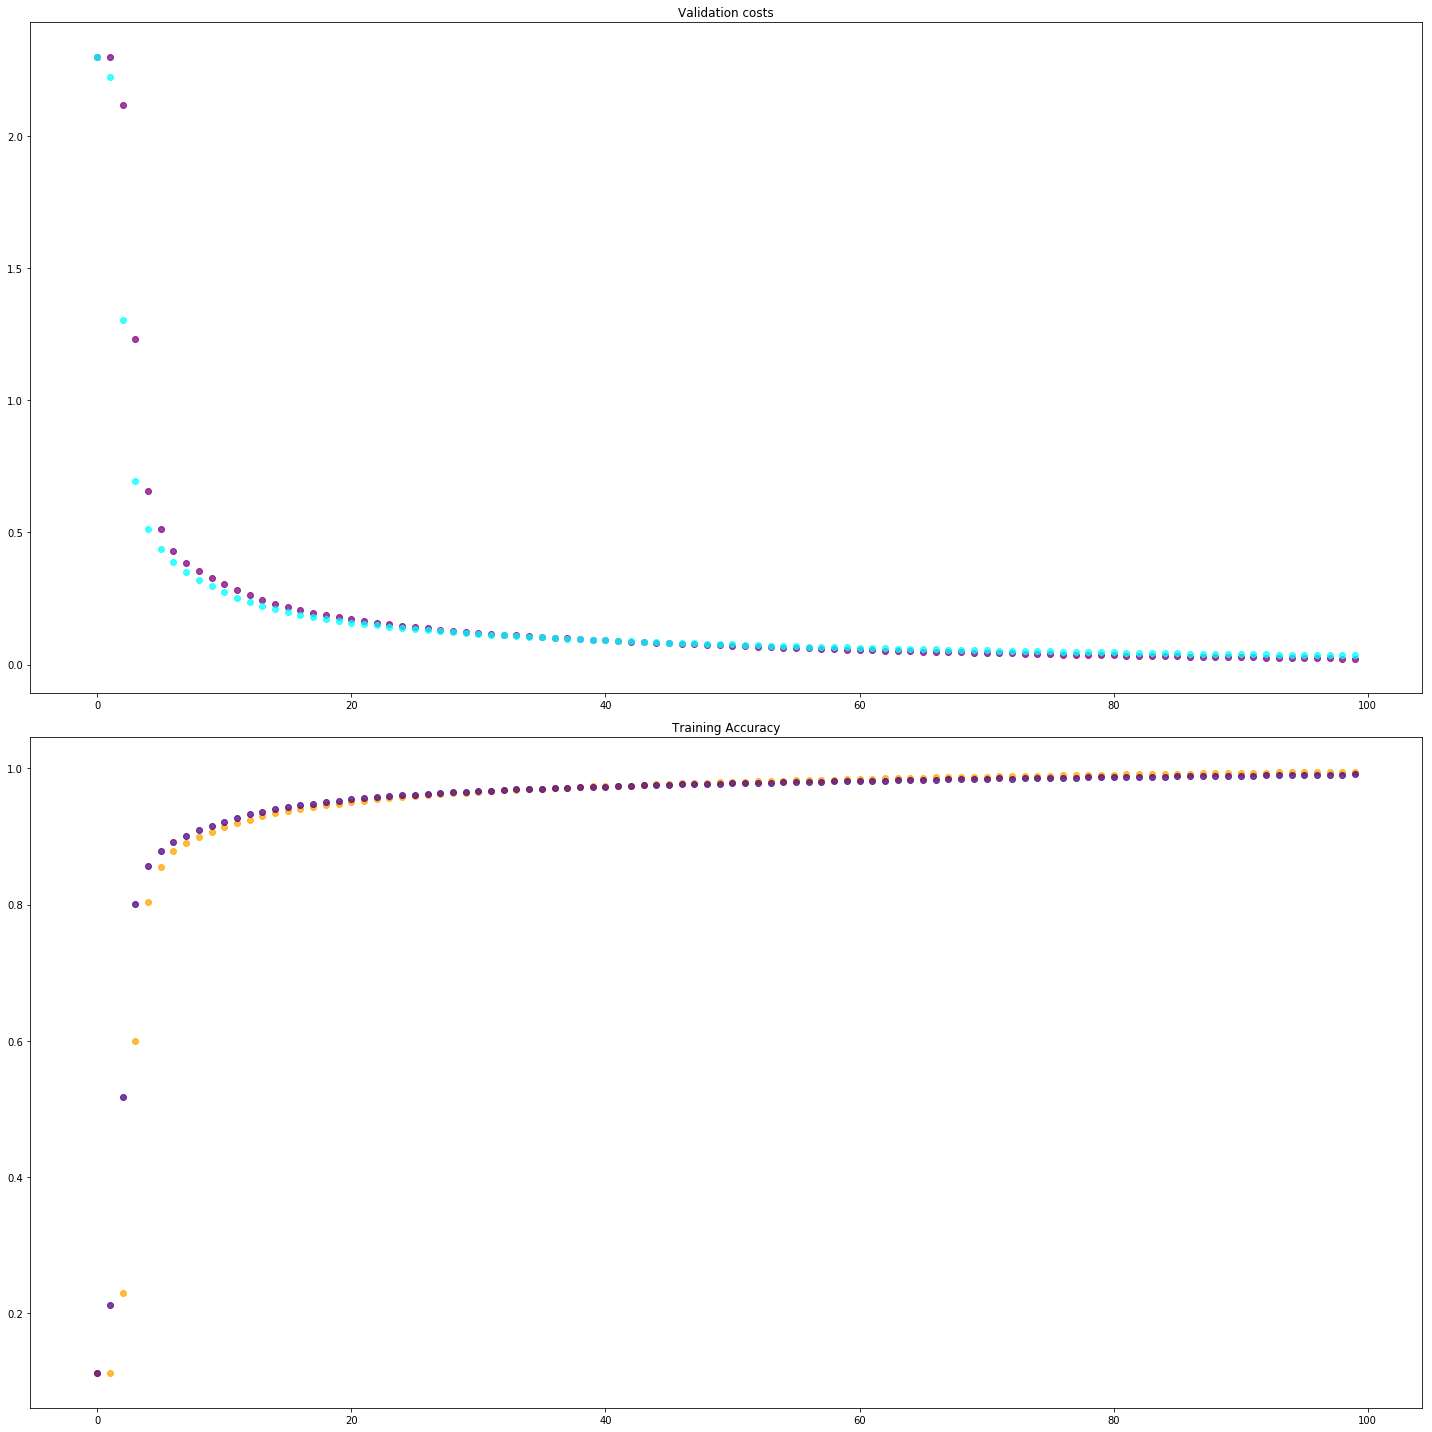

In [13]:
fig, axes = plt.subplots(2,1, figsize=(20,20))
axes[0].set_title("Validation costs")
axes[1].set_title("Training Accuracy")
for x, y in enumerate(cost):
    axes[0].scatter(x, y, color='purple', alpha=0.75)
for x, y in enumerate(cost_nn2):
    axes[0].scatter(x, y, color='cyan', alpha=0.75)
for x, y in enumerate(score):
    axes[1].scatter(x, y, color='orange', alpha=0.75)
for x, y in enumerate(score_nn2):
    axes[1].scatter(x, y, color='indigo', alpha=0.75)

plt.tight_layout()
plt.show()

## Effects of the batch size on results

In [14]:
nn3 = nn.BuildModel([("tanh", 784, 101), ("relu", 101, 20), ("softmax", 20, 10)])

In [15]:
cost_nn3, score_nn3 = nn.Train(nn3, X_train, y_train, num_epochs=100, batch_s=100, learning_rate=.01)

Training started, may take few minutes.
Training completed in 423.92088437080383 seconds.


nn1 vs nn3: altering only batch size of the model. nn1 has 101 batch size 40 and nn3 has batch size 100 in the model design. Results are close to each other but nn1 performed slightly better in terms of achieving higher accuracy in first all epochs. This inclines 40 is a better batch size comparing to 100 in this specific case.

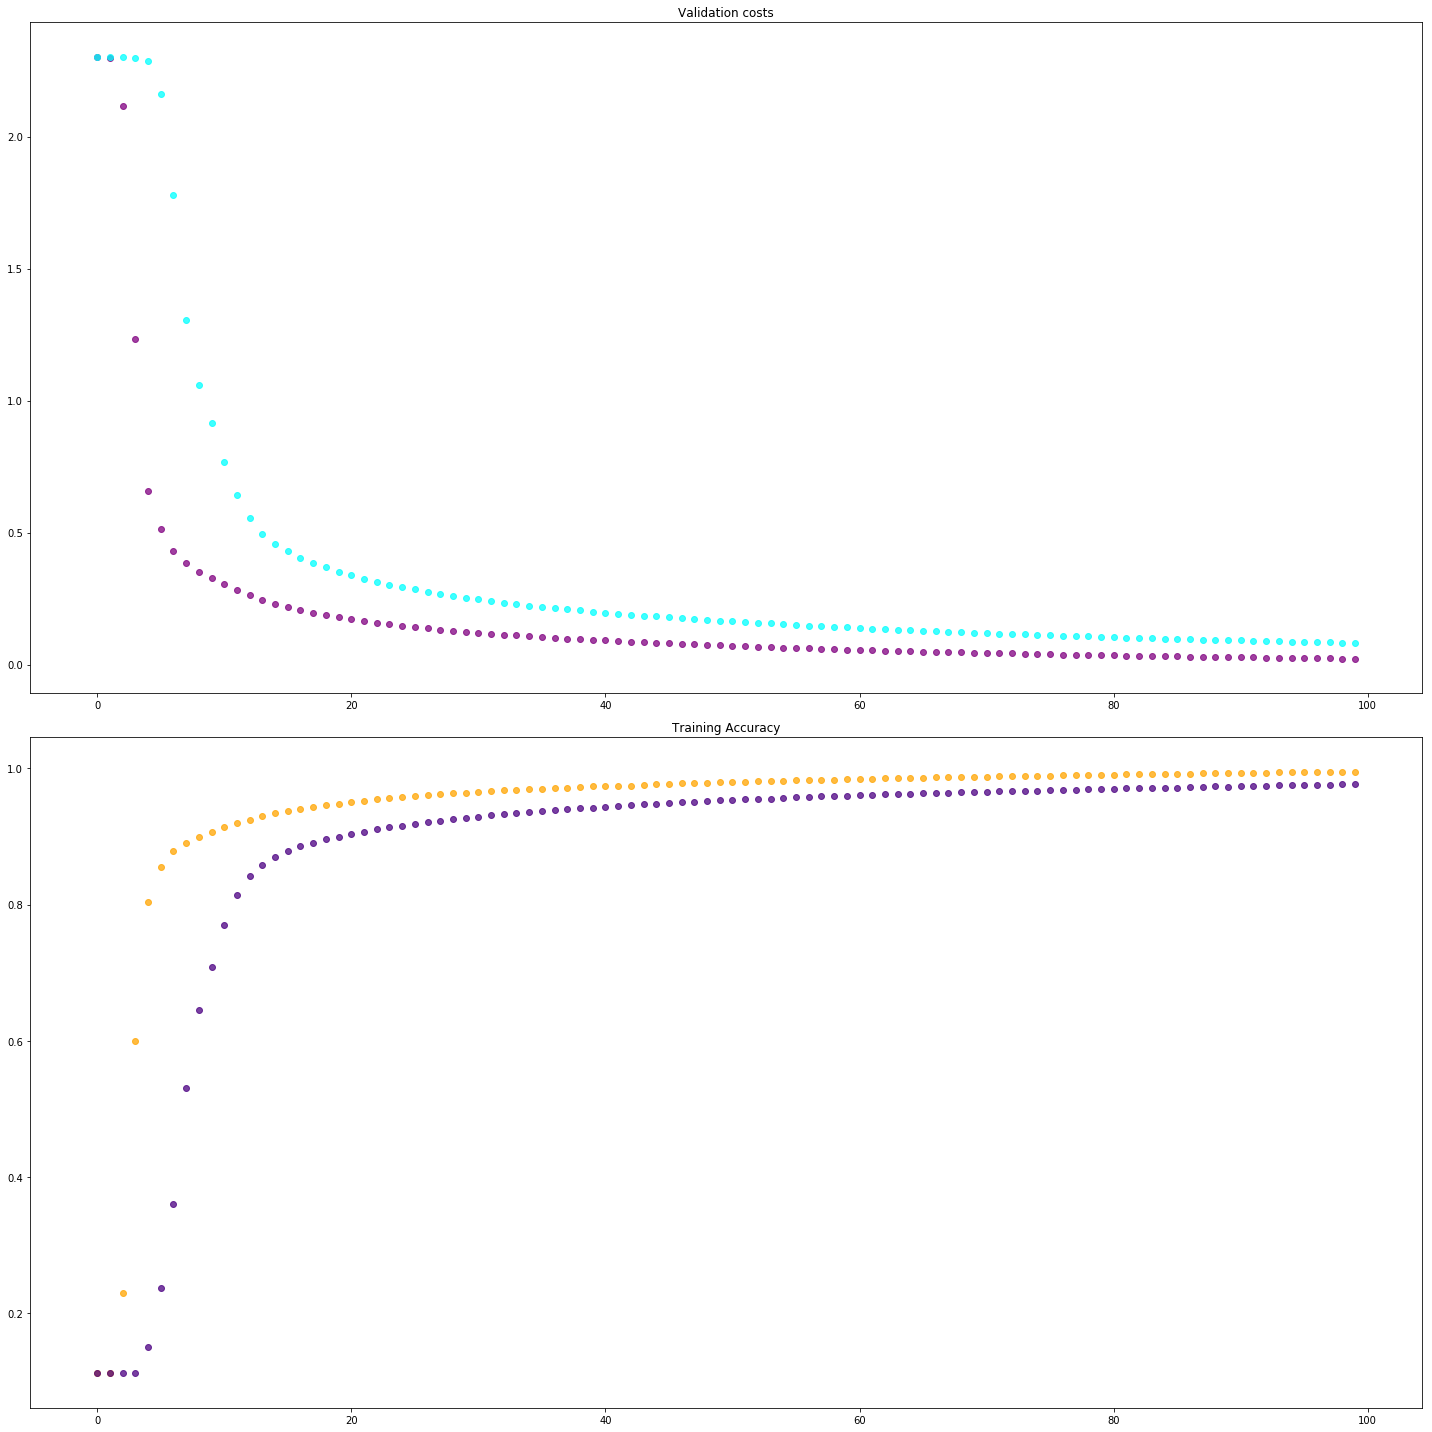

In [16]:
fig, axes = plt.subplots(2,1, figsize=(20,20))
axes[0].set_title("Validation costs")
axes[1].set_title("Training Accuracy")
for x, y in enumerate(cost):
    axes[0].scatter(x, y, color='purple', alpha=0.75)
for x, y in enumerate(cost_nn3):
    axes[0].scatter(x, y, color='cyan', alpha=0.75)
for x, y in enumerate(score):
    axes[1].scatter(x, y, color='orange', alpha=0.75)
for x, y in enumerate(score_nn3):
    axes[1].scatter(x, y, color='indigo', alpha=0.75)

plt.tight_layout()
plt.show()

## 9 Different batch sizes from 10 to 100 and results

In [20]:
nn_ = []
cost_ = []
score_ = []
for i in range(1,10):
    n_ = (nn.BuildModel([("tanh", 784, 101), ("relu", 101, 20), ("softmax", 20, 10)]))
    c_, s_ = nn.Train(n_, X_train, y_train, num_epochs=100, batch_s=i*10, learning_rate=.01)
    nn_.append(n_)
    cost_.append(c_)
    score_.append(s_)

Training started, may take few minutes.
Training completed in 1129.0044441223145 seconds.
Training started, may take few minutes.
Training completed in 656.7118804454803 seconds.
Training started, may take few minutes.
Training completed in 569.1422641277313 seconds.
Training started, may take few minutes.
Training completed in 512.7162539958954 seconds.
Training started, may take few minutes.
Training completed in 474.93874430656433 seconds.
Training started, may take few minutes.
Training completed in 450.5812404155731 seconds.
Training started, may take few minutes.
Training completed in 438.26995849609375 seconds.
Training started, may take few minutes.
Training completed in 425.62033700942993 seconds.
Training started, may take few minutes.
Training completed in 418.7726845741272 seconds.


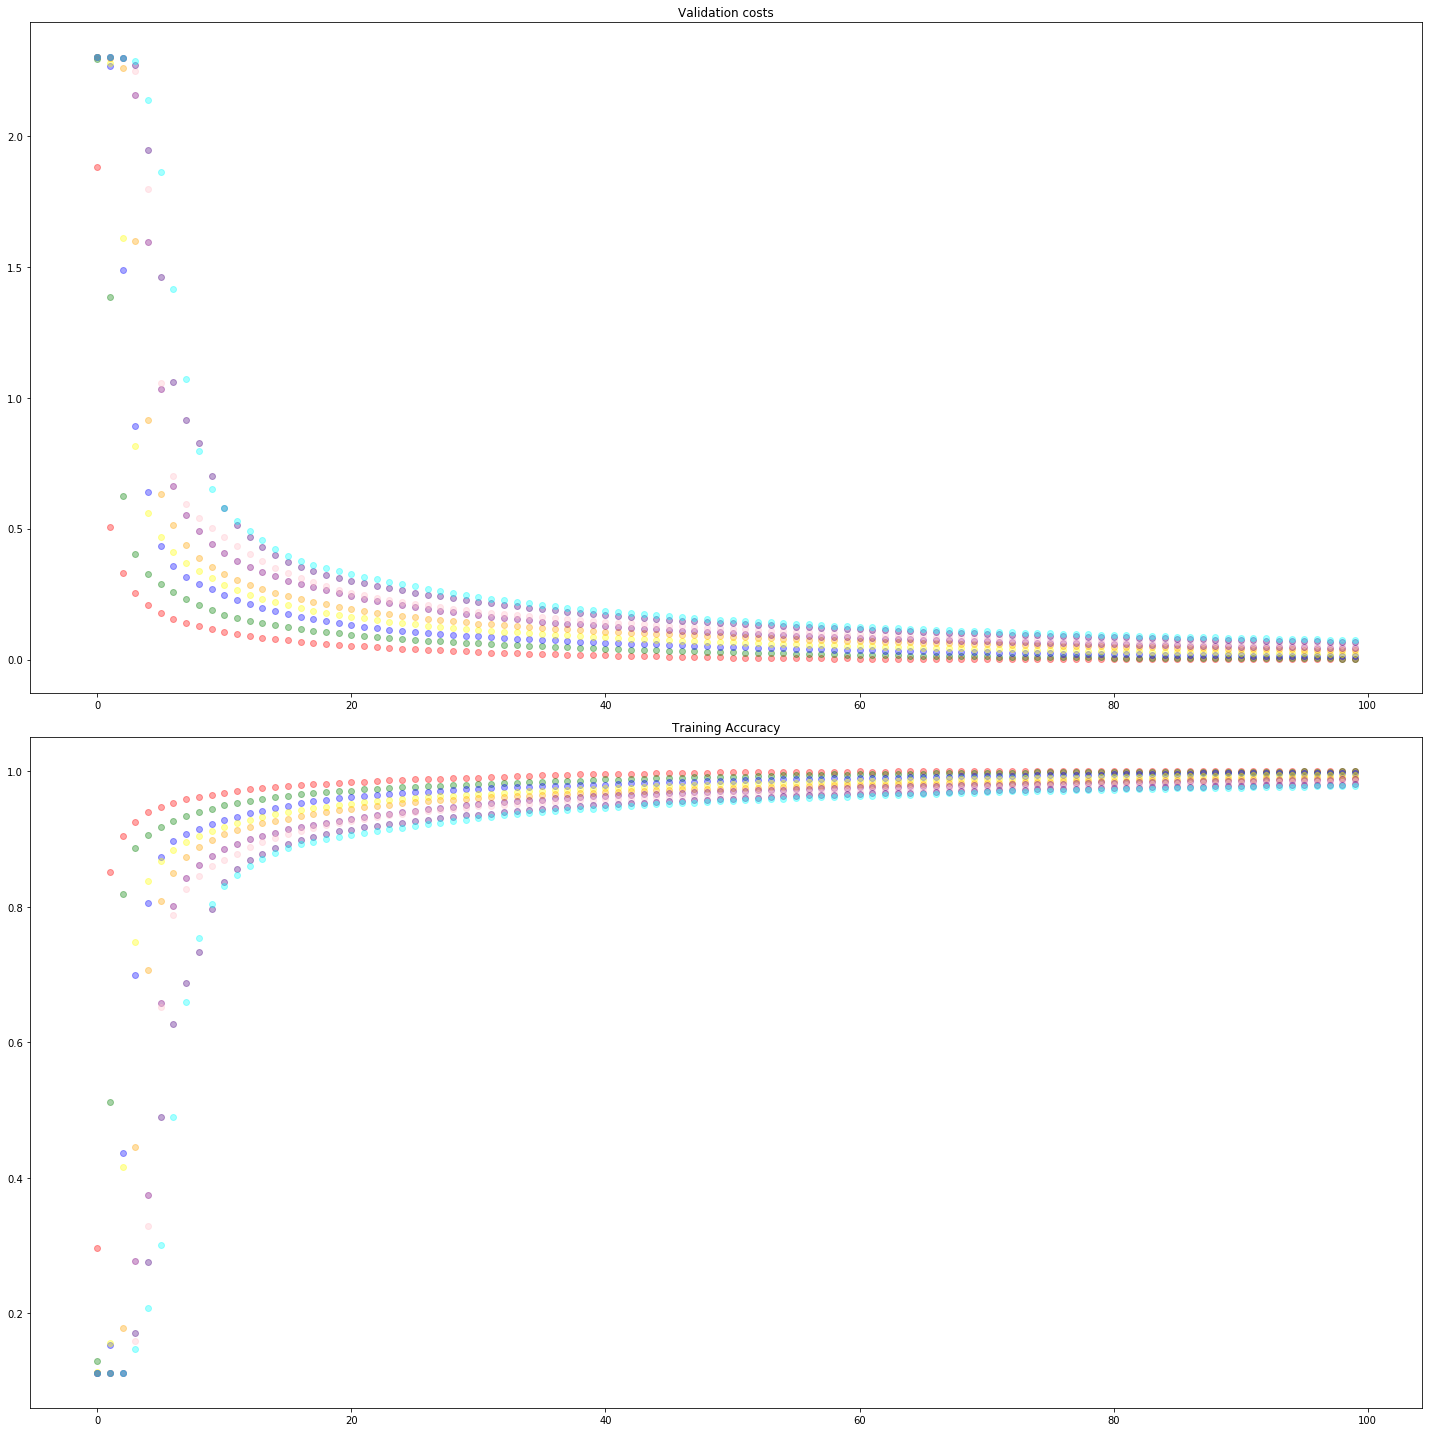

In [21]:
colors = ["red", "green", "blue", "yellow", "orange", "purple", "pink", "indigo", "cyan", "magenta"]
fig, axes = plt.subplots(2,1, figsize=(20,20))
axes[0].set_title("Validation costs")
axes[1].set_title("Training Accuracy")
for i in range(len(nn_)):
    for x, y in enumerate(cost_[i]):
        axes[0].scatter(x, y, color=colors[i], alpha=0.35)
    for x, y in enumerate(score_[i]):
        axes[1].scatter(x, y, color=colors[i], alpha=0.35)

plt.tight_layout()
plt.show()

In [41]:
print("Best Training Accuracy: %s" % (score_[0][-1]))
print("Accuracy over epochs:")
print(score_[0])

Best Training Accuracy: 1.0
Accuracy over epochs:
[0.29721666666666668, 0.85161666666666669, 0.90483333333333349, 0.92536666666666678, 0.94016666666666671, 0.94805000000000017, 0.95394999999999996, 0.95883333333333332, 0.96199999999999997, 0.96505000000000007, 0.9684166666666667, 0.97086666666666677, 0.9732833333333335, 0.97499999999999998, 0.97631666666666672, 0.97778333333333334, 0.97930000000000006, 0.98080000000000001, 0.98181666666666656, 0.9829500000000001, 0.98426666666666673, 0.98468333333333335, 0.98593333333333344, 0.98675000000000002, 0.98716666666666664, 0.98824999999999996, 0.98854999999999993, 0.98926666666666674, 0.99024999999999996, 0.99078333333333335, 0.99096666666666666, 0.99235000000000007, 0.99226666666666663, 0.99288333333333334, 0.99360000000000004, 0.99428333333333341, 0.99493333333333345, 0.99483333333333335, 0.99563333333333326, 0.99573333333333325, 0.99593333333333345, 0.9964666666666665, 0.99686666666666668, 0.99675000000000002, 0.99744999999999984, 0.997766

The plot above shows the neural network trained with batch size of 10 is best in accuracy, but also time measurements show it's the slowest with 1129 seconds of execution time. It's also clear that all the neural networks have ~98% training accuracy after 100 epochs. Therefore choosing the batch size for a neural network is a trade off in between computation time and precision of accuracy.

In [46]:
prediction_ = []
test_accuracy_ = []
for i in range(1,10):
    p_ = nn.Predict(X_test, nn_[i-1])
    t_ = nn.CalculateAccuracy(p_, y_test)
    prediction_.append(p_)
    test_accuracy_.append(t_)
print(test_accuracy_)

[0.9767, 0.9726, 0.9762, 0.9735, 0.9729, 0.9731, 0.9728, 0.9695, 0.9693]


## Comparing tanh and relu functions on three layer models

In [47]:
nn4 = nn.BuildModel([("tanh", 784, 50), ("softmax", 50, 10)])
nn5 = nn.BuildModel([("relu", 784, 50), ("softmax", 50, 10)])

In [48]:
cost_nn4, score_nn4 = nn.Train(nn4, X_train, y_train, num_epochs=100, batch_s=30, learning_rate=.01)
cost_nn5, score_nn5 = nn.Train(nn5, X_train, y_train, num_epochs=100, batch_s=30, learning_rate=.01)

Training started, may take few minutes.
Training completed in 351.40808725357056 seconds.
Training started, may take few minutes.
Training completed in 298.19231128692627 seconds.


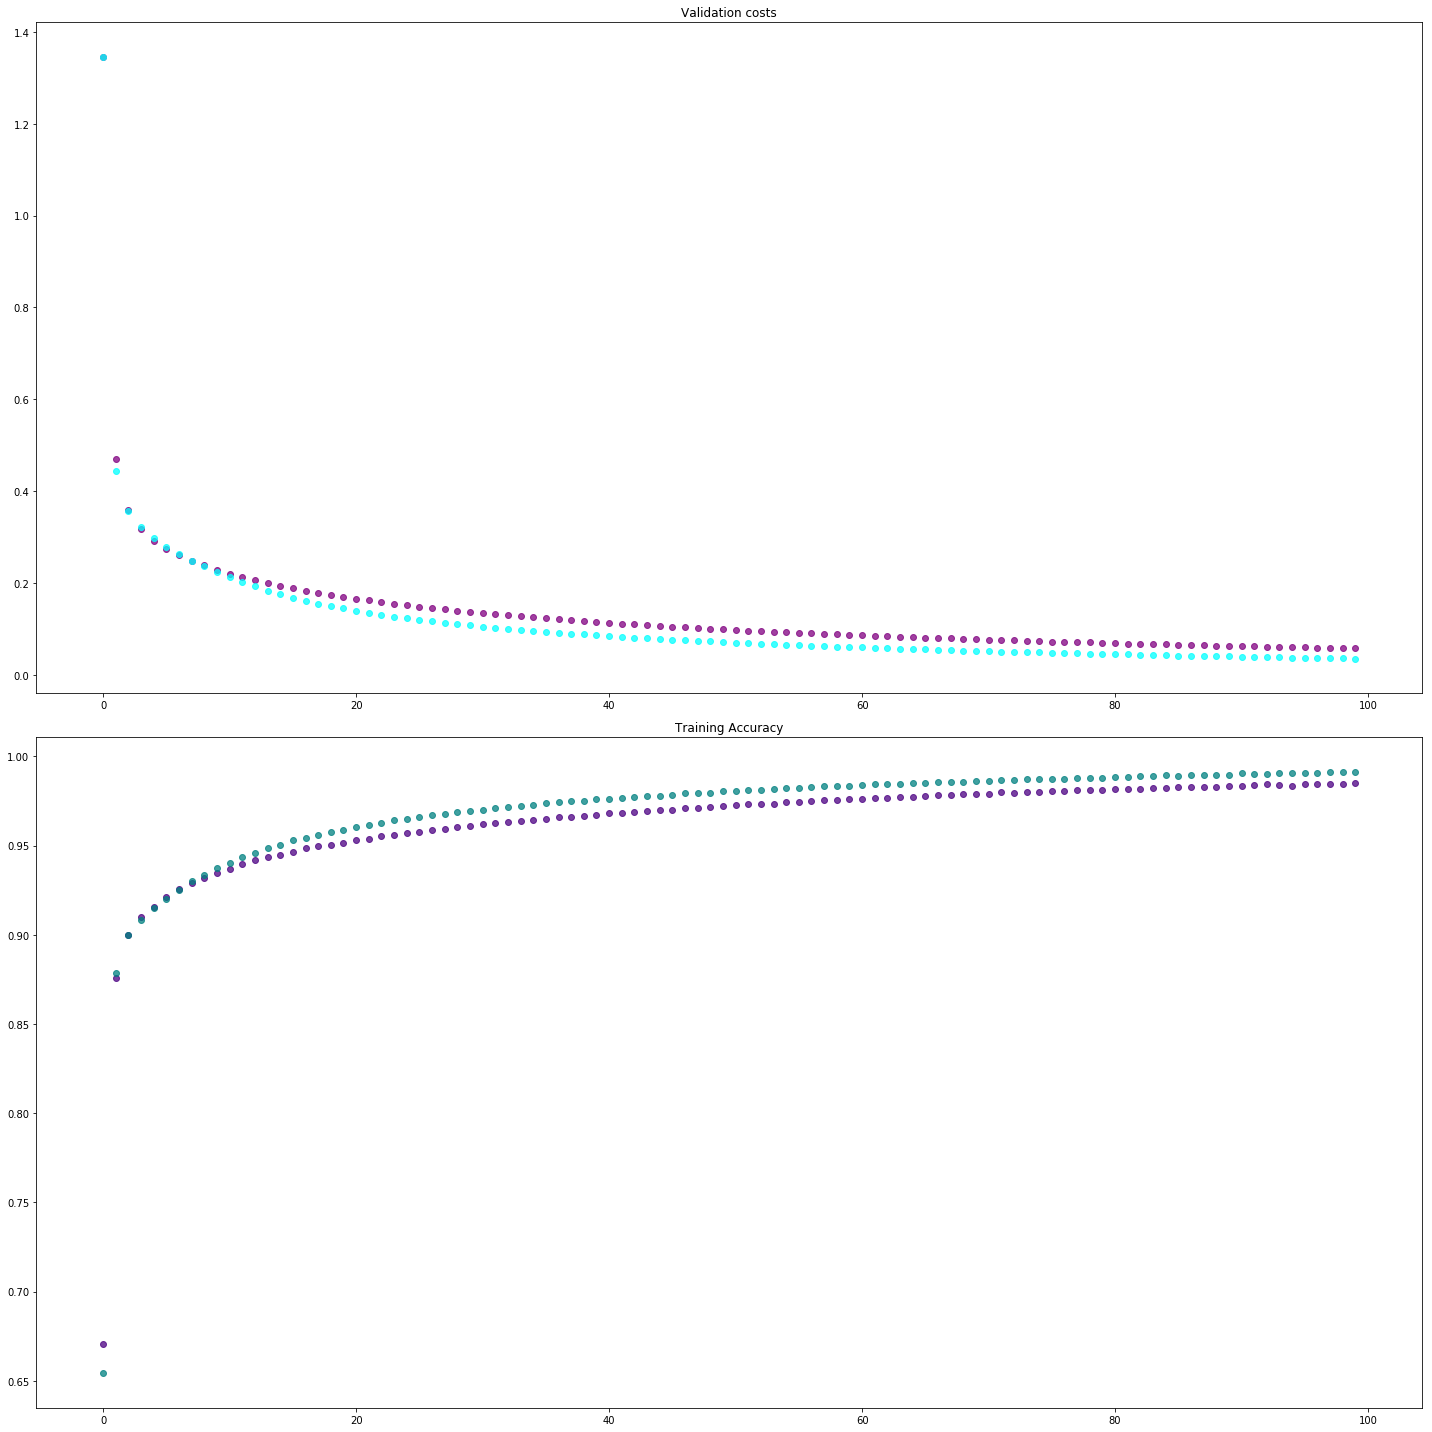

In [49]:
fig, axes = plt.subplots(2,1, figsize=(20,20))
axes[0].set_title("Validation costs")
axes[1].set_title("Training Accuracy")
for x, y in enumerate(cost_nn4):
    axes[0].scatter(x, y, color='purple', alpha=0.75)
for x, y in enumerate(cost_nn5):
    axes[0].scatter(x, y, color='cyan', alpha=0.75)
for x, y in enumerate(score_nn4):
    axes[1].scatter(x, y, color='indigo', alpha=0.75)
for x, y in enumerate(score_nn5):
    axes[1].scatter(x, y, color='teal', alpha=0.75)

plt.tight_layout()
plt.show()

In [51]:
prediction_nn4 = nn.Predict(X_test, nn4)
prediction_nn5 = nn.Predict(X_test, nn5)
test_accuracy_nn4 = nn.CalculateAccuracy(prediction_nn4, y_test)
test_accuracy_nn5 = nn.CalculateAccuracy(prediction_nn5, y_test)
print("Test accuracy for tanh model: %s" % str(test_accuracy_nn4))
print("Test accuracy for relu model: %s" % str(test_accuracy_nn5))

Test accuracy for tanh model: 0.9693
Test accuracy for relu model: 0.9743


On a single hidden layer with 50 nodes, the model with relu activation has better accuracy on both training and test comparing to the model with tanh activation.  

## Comparison of models with 2 hidden layers

In [54]:
nn6 = nn.BuildModel([("tanh", 784, 25), ("tanh", 25, 100), ("softmax", 100, 10)])
nn7 = nn.BuildModel([("relu", 784, 25), ("relu", 25, 100), ("softmax", 100, 10)])
nn8 = nn.BuildModel([("tanh", 784, 25), ("relu", 25, 100), ("softmax", 100, 10)])
nn9 = nn.BuildModel([("relu", 784, 25), ("tanh", 25, 100), ("softmax", 100, 10)])

In [55]:
cost_nn6, score_nn6 = nn.Train(nn6, X_train, y_train, num_epochs=100, batch_s=10, learning_rate=.01)
cost_nn7, score_nn7 = nn.Train(nn7, X_train, y_train, num_epochs=100, batch_s=10, learning_rate=.01)
cost_nn8, score_nn8 = nn.Train(nn8, X_train, y_train, num_epochs=100, batch_s=10, learning_rate=.01)
cost_nn9, score_nn9 = nn.Train(nn9, X_train, y_train, num_epochs=100, batch_s=10, learning_rate=.01)

Training started, may take few minutes.
Training completed in 378.8750789165497 seconds.
Training started, may take few minutes.
Training completed in 304.5299656391144 seconds.
Training started, may take few minutes.
Training completed in 314.66451597213745 seconds.
Training started, may take few minutes.
Training completed in 349.9374248981476 seconds.


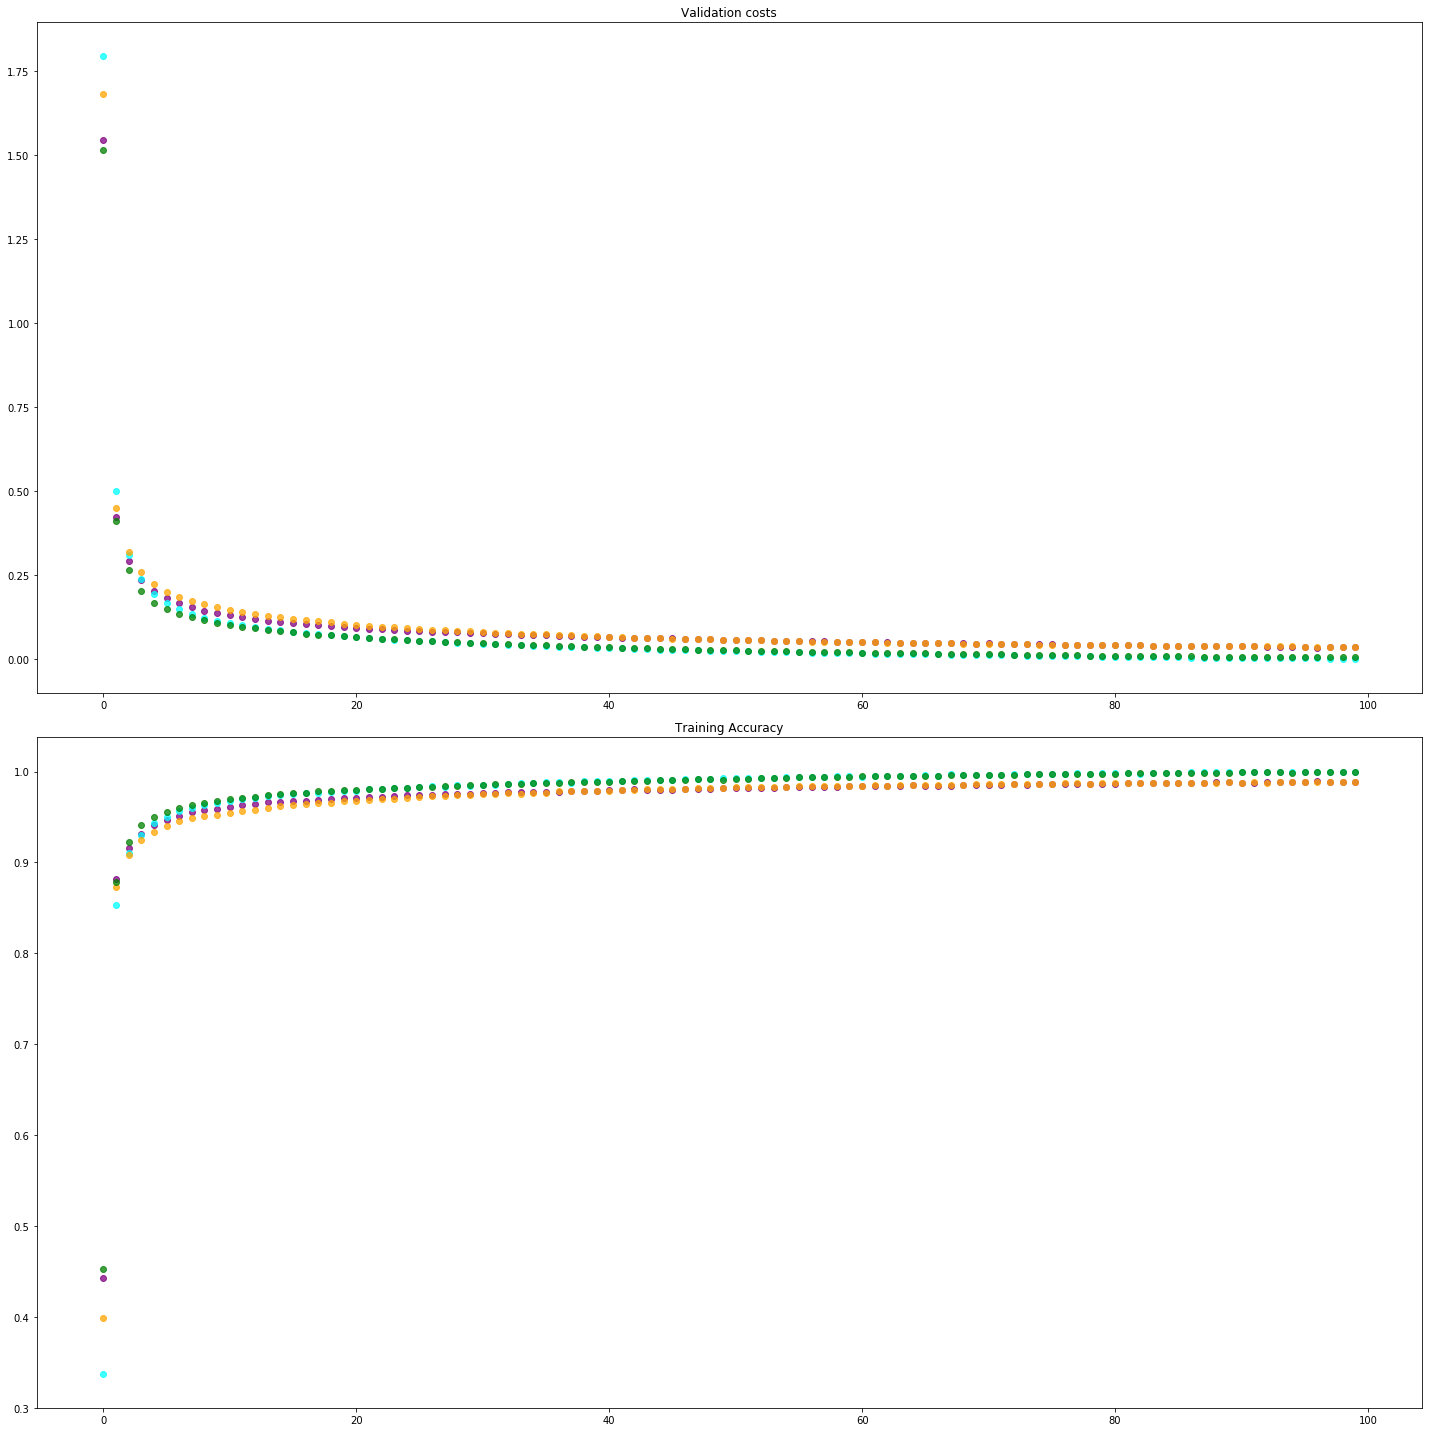

In [57]:
fig, axes = plt.subplots(2,1, figsize=(20,20))
axes[0].set_title("Validation costs")
axes[1].set_title("Training Accuracy")
for x, y in enumerate(cost_nn6):
    axes[0].scatter(x, y, color='purple', alpha=0.75)
for x, y in enumerate(cost_nn7):
    axes[0].scatter(x, y, color='cyan', alpha=0.75)
for x, y in enumerate(cost_nn8):
    axes[0].scatter(x, y, color='orange', alpha=0.75)
for x, y in enumerate(cost_nn9):
    axes[0].scatter(x, y, color='green', alpha=0.75)
for x, y in enumerate(score_nn6):
    axes[1].scatter(x, y, color='purple', alpha=0.75)
for x, y in enumerate(score_nn7):
    axes[1].scatter(x, y, color='cyan', alpha=0.75)
for x, y in enumerate(score_nn8):
    axes[1].scatter(x, y, color='orange', alpha=0.75)
for x, y in enumerate(score_nn9):
    axes[1].scatter(x, y, color='green', alpha=0.75)

plt.tight_layout()
plt.show()

In [59]:
prediction_nn6 = nn.Predict(X_test, nn6)
prediction_nn7 = nn.Predict(X_test, nn7)
prediction_nn8 = nn.Predict(X_test, nn8)
prediction_nn9 = nn.Predict(X_test, nn9)
test_accuracy_nn6 = nn.CalculateAccuracy(prediction_nn6, y_test)
test_accuracy_nn7 = nn.CalculateAccuracy(prediction_nn7, y_test)
test_accuracy_nn8 = nn.CalculateAccuracy(prediction_nn8, y_test)
test_accuracy_nn9 = nn.CalculateAccuracy(prediction_nn9, y_test)
print("Test accuracy for tanh-tanh model: %s" % str(test_accuracy_nn4))
print("Test accuracy for relu-relu model: %s" % str(test_accuracy_nn5))
print("Test accuracy for tanh-relu model: %s" % str(test_accuracy_nn4))
print("Test accuracy for relu-tanh model: %s" % str(test_accuracy_nn5))

Test accuracy for tanh-tanh model: 0.9693
Test accuracy for relu-relu model: 0.9743
Test accuracy for tanh-relu model: 0.9693
Test accuracy for relu-tanh model: 0.9743


In [60]:
nn10 = nn.BuildModel([("tanh", 784, 128), ("relu", 128, 32), ("softmax", 32, 10)])
nn11 = nn.BuildModel([("relu", 784, 128), ("tanh", 128, 32), ("softmax", 32, 10)])

In [61]:
cost_nn10, score_nn10 = nn.Train(nn10, X_train, y_train, num_epochs=100, batch_s=10, learning_rate=.01)
cost_nn11, score_nn11 = nn.Train(nn11, X_train, y_train, num_epochs=100, batch_s=10, learning_rate=.01)

Training started, may take few minutes.
Training completed in 1326.716358423233 seconds.
Training started, may take few minutes.
Training completed in 1254.3409404754639 seconds.


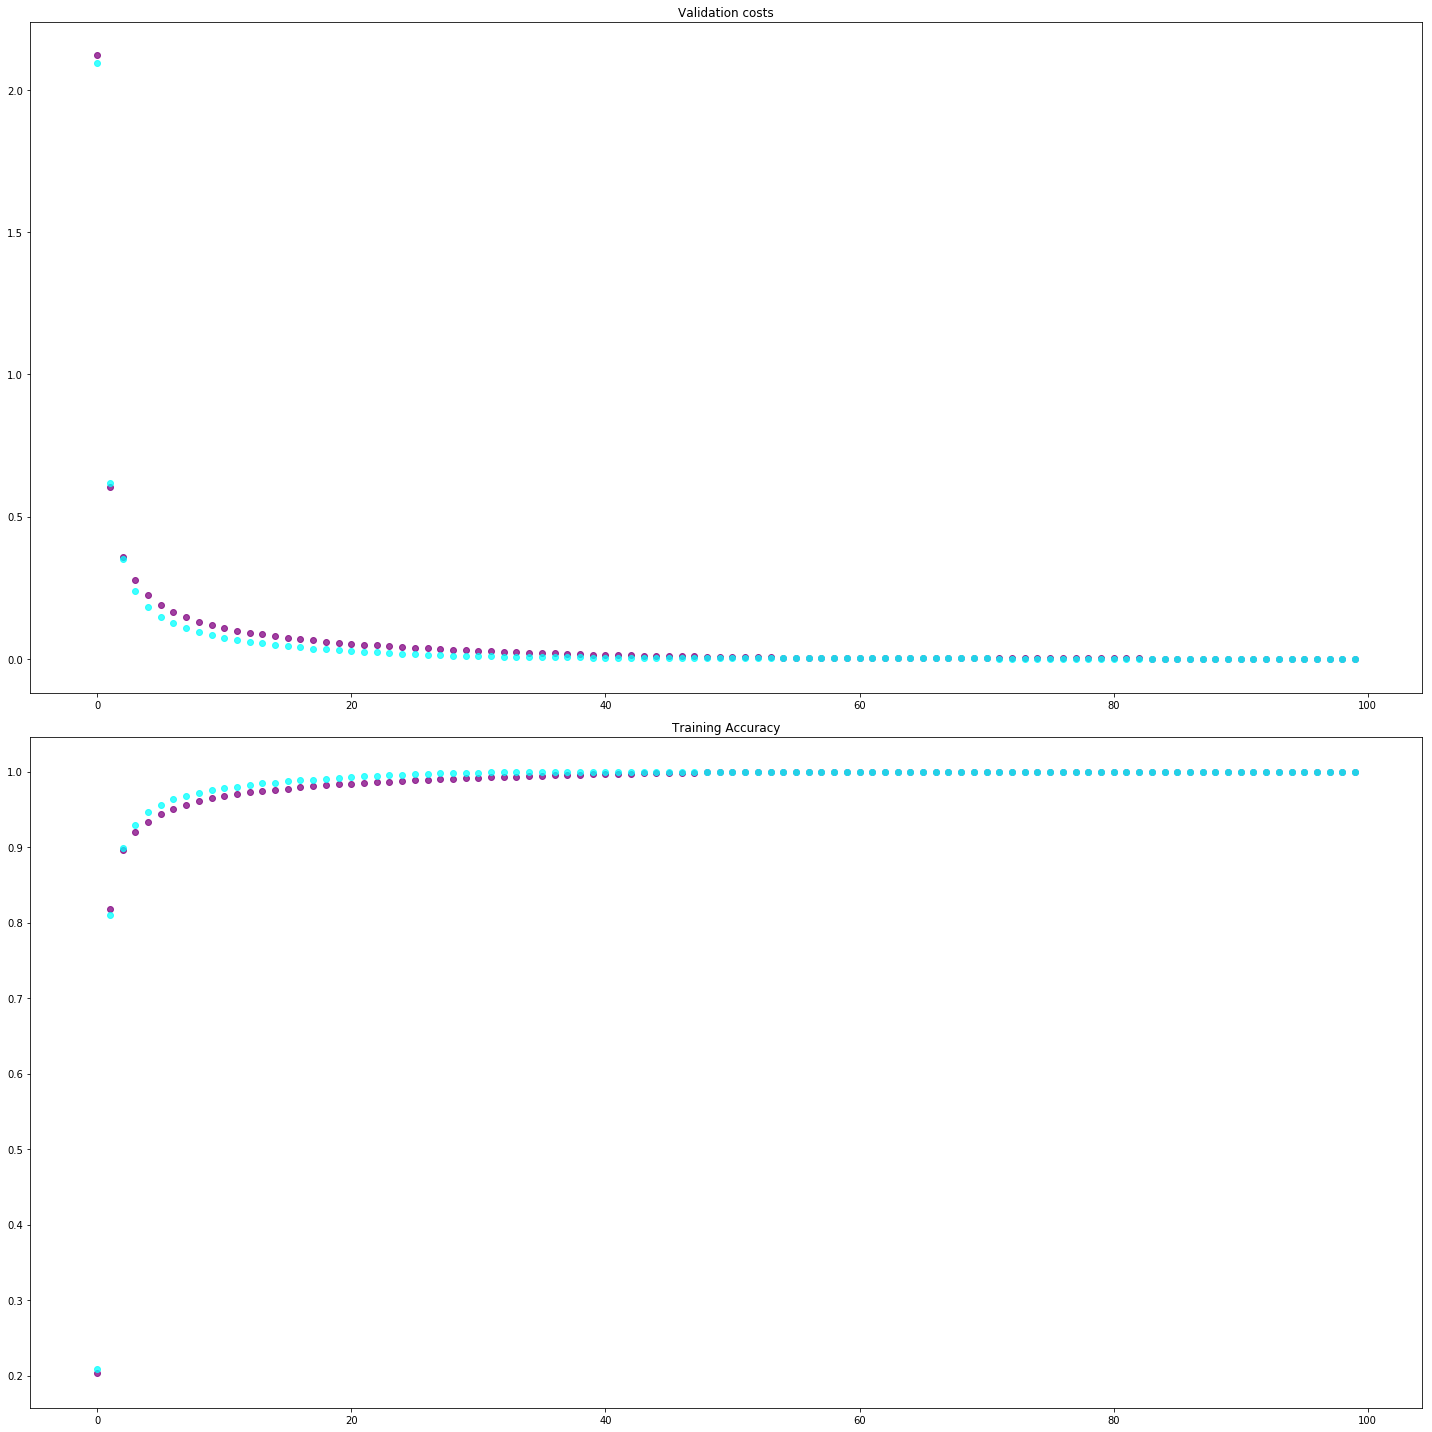

In [62]:
fig, axes = plt.subplots(2,1, figsize=(20,20))
axes[0].set_title("Validation costs")
axes[1].set_title("Training Accuracy")
for x, y in enumerate(cost_nn10):
    axes[0].scatter(x, y, color='purple', alpha=0.75)
for x, y in enumerate(cost_nn11):
    axes[0].scatter(x, y, color='cyan', alpha=0.75)
for x, y in enumerate(score_nn10):
    axes[1].scatter(x, y, color='purple', alpha=0.75)
for x, y in enumerate(score_nn11):
    axes[1].scatter(x, y, color='cyan', alpha=0.75)

plt.tight_layout()
plt.show()

In [63]:
prediction_nn10 = nn.Predict(X_test, nn10)
prediction_nn11 = nn.Predict(X_test, nn11)
test_accuracy_nn10 = nn.CalculateAccuracy(prediction_nn10, y_test)
test_accuracy_nn11 = nn.CalculateAccuracy(prediction_nn11, y_test)
print("Test accuracy for tanh-tanh model: %s" % str(test_accuracy_nn10))
print("Test accuracy for relu-relu model: %s" % str(test_accuracy_nn11))

Test accuracy for tanh-tanh model: 0.9763
Test accuracy for relu-relu model: 0.9777


In [68]:
from PIL import Image

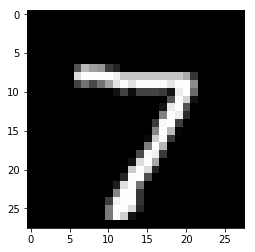

In [81]:
a = Image.fromarray(np.asarray(np.reshape(X_test[0], (28,28))*255))
plt.imshow(a)

In [84]:
print(np.amax(prediction_nn11[0]))
print(np.argmax(prediction_nn11[0]))

0.999998204803
7


## Introducing own handwritten digits to Neural Networks

In [116]:
images = []
_X = []
_y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range(10):
    f = "./data/" + str(i) + ".png"
    i = Image.open(f).convert("L")
    images.append(i)
    a = np.ravel(np.asarray(i)/255)
    _X.append(a)

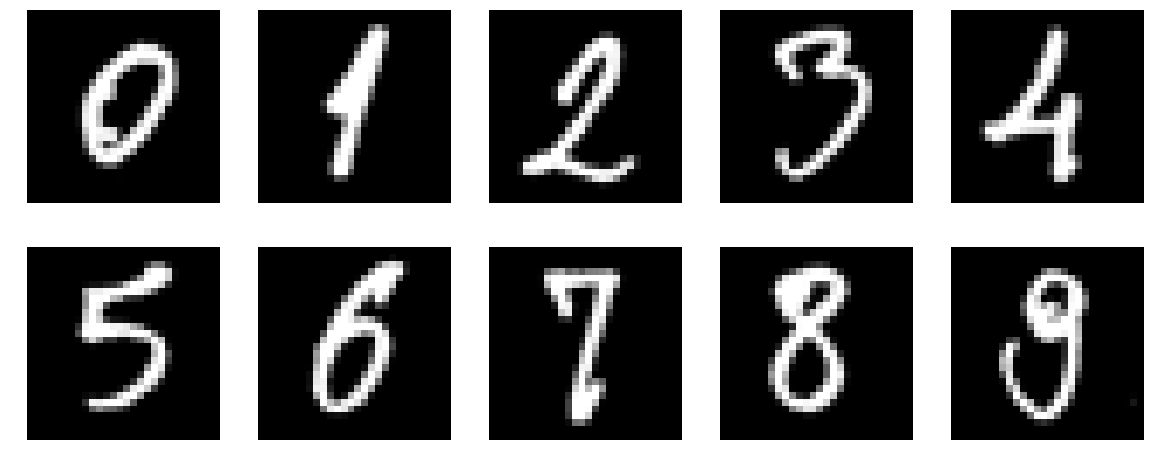

In [117]:
fig = plt.figure(figsize=(20,8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(images[i])
    ax.axis("off")
plt.show()

In [118]:
_y = nn.OneHot(_y)
print(_y)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [119]:
pred_new_nn11 = nn.Predict(_X, nn11)
test_accuracy_new_nn11 = nn.CalculateAccuracy(pred_new_nn11, _y)

In [120]:
print(test_accuracy_new_nn11)

0.6


In [123]:
for i in range(10):
    print("Predicted value: %s" % str(np.argmax(pred_new_nn11[i])))
    print("Prediction: %s" % str(np.amax(pred_new_nn11[i])))
    print("True Label: %s" % str(np.argmax(_y[i])))

Predicted value: 0
Prediction: 0.999465820107
True Label: 0
Predicted value: 1
Prediction: 0.974151568483
True Label: 1
Predicted value: 2
Prediction: 0.999668532928
True Label: 2
Predicted value: 2
Prediction: 0.968168032835
True Label: 3
Predicted value: 4
Prediction: 0.997505487555
True Label: 4
Predicted value: 5
Prediction: 0.999997847477
True Label: 5
Predicted value: 6
Prediction: 0.996114260966
True Label: 6
Predicted value: 2
Prediction: 0.884851744305
True Label: 7
Predicted value: 2
Prediction: 0.82533889515
True Label: 8
Predicted value: 8
Prediction: 0.96318429791
True Label: 9
